# Final Project FP-6: Machine Learning


<br>
<br>


___

<br>

# Predicting Student Grades Using Machine Learning: Which Lifestyle Factors Matter Most?


* **Name**:  Jorre Wyffels
* **Student number**:  B990374161

<br>

### Dataset source:

The dataset is called ["Lifestyle Factors and Their Impact on Students"](https://www.kaggle.com/datasets/charlottebennett1234/lifestyle-factors-and-their-impact-on-students/data) and was published on kaggle.com. It is a practice dataset generated to provide plausible data. </span>

Lifestyle factors and their impact on students. (2025, April 10). Kaggle. https://www.kaggle.com/datasets/charlottebennett1234/lifestyle-factors-and-their-impact-on-students/data</span>

<br>

___

## Machine Learning Results



In [1]:
%%capture
%run 'machine.ipynb'

## Analysis Plan

This analysis uses **machine learning classification** to predict student stress levels (Low, Moderate, High) based on lifestyle factors.

**Research Question:** Can we predict a student's stress level from their daily habits?

- **Target variable**: stress (Low=1, Moderate=2, High=3)
- **Features**: studyhours, sleephours, socialhours, activityhours, Gender
- **Validation**: train/test split (80/20, random_state=42)
- **Models**: K-Nearest Neighbors (KNN) and Decision Tree

**Main Results:**
1. Feature Importance: Which lifestyle factor predicts stress best?
2. Model Comparison: Which model performs better and why?

<br>

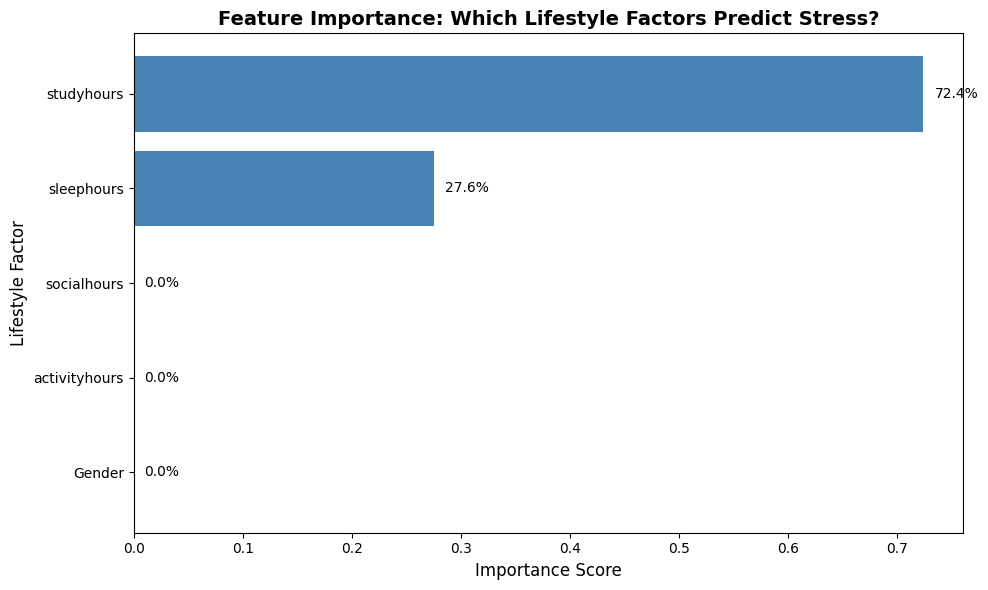

In [1]:
# Main Result 1: Feature Importance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

# load and prepare data
df = pd.read_csv('student_lifestyle_dataset..csv')
df = df.rename(columns={
    'Grades': 'grades',
    'Stress_Level': 'stress',
    'Study_Hours_Per_Day': 'studyhours',
    'Extracurricular_Hours_Per_Day': 'echours',
    'Sleep_Hours_Per_Day': 'sleephours',
    'Social_Hours_Per_Day': 'socialhours',
    'Physical_Activity_Hours_Per_Day': 'activityhours'
})
df['stress'] = df['stress'].map({'Low': 1, 'Moderate': 2, 'High': 3})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# prepare features and target
X = df[['studyhours', 'sleephours', 'socialhours', 'activityhours', 'Gender']]
y = df['stress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train decision tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# feature importance
feature_importances = tree_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Lifestyle Factor', fontsize=12)
plt.title('Feature Importance: Which Lifestyle Factors Predict Stress?', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance'])):
    plt.text(importance + 0.01, i, f'{importance*100:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Result 1: Study Hours Dominates Stress Prediction**

The Decision Tree model reveals that **study hours (72.4%)** is by far the most important predictor of stress, with **sleep hours (27.6%)** as secondary. Social time, exercise, and gender have zero importance.

**Key insight:** Once you know a student's study hours and sleep hours, knowing their social time or exercise habits doesn't help predict stress any better. This suggests that **academic pressure is the overwhelming source of student stress**, and interventions should focus primarily on managing study workload rather than promoting exercise or social activities.

<br>

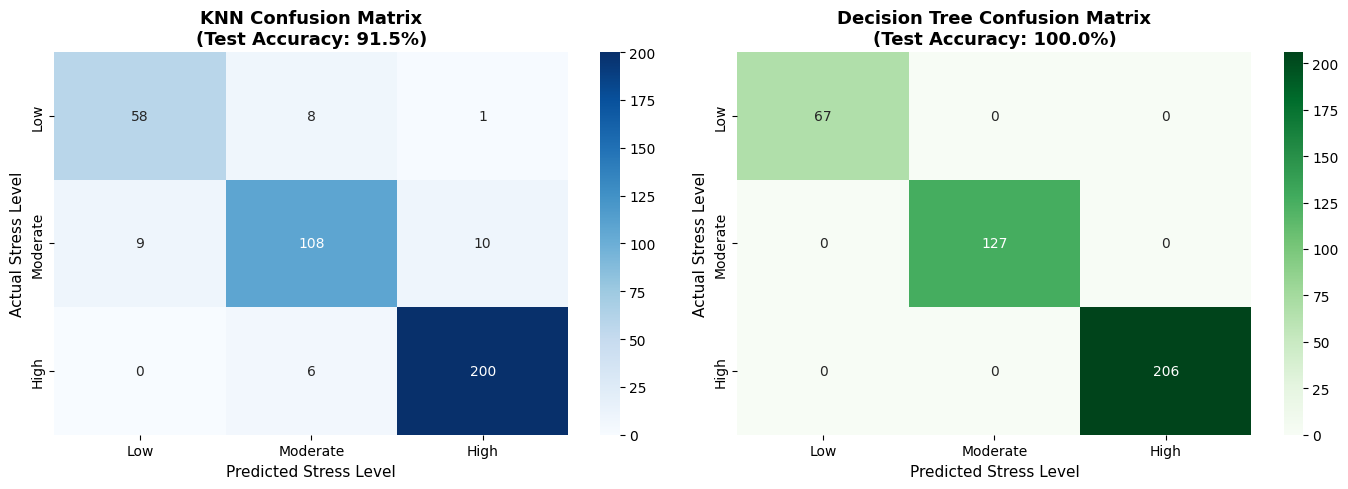

KNN Test Accuracy: 91.5% (34 errors out of 400)
Decision Tree Test Accuracy: 100.0% (0 errors out of 400)


In [2]:
# Main Result 2: Model Comparison (KNN vs Decision Tree)

# train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# predictions
y_test_pred_knn = knn_model.predict(X_test)
y_test_pred_tree = tree_model.predict(X_test)

# accuracies
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

# confusion matrices
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
cm_tree = confusion_matrix(y_test, y_test_pred_tree)

# plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
axes[0].set_title(f'KNN Confusion Matrix\n(Test Accuracy: {test_accuracy_knn*100:.1f}%)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Stress Level', fontsize=11)
axes[0].set_ylabel('Actual Stress Level', fontsize=11)

sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
axes[1].set_title(f'Decision Tree Confusion Matrix\n(Test Accuracy: {test_accuracy_tree*100:.1f}%)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Stress Level', fontsize=11)
axes[1].set_ylabel('Actual Stress Level', fontsize=11)

plt.tight_layout()
plt.show()

print(f"KNN Test Accuracy: {test_accuracy_knn*100:.1f}% ({np.sum(y_test != y_test_pred_knn)} errors out of 400)")
print(f"Decision Tree Test Accuracy: {test_accuracy_tree*100:.1f}% ({np.sum(y_test != y_test_pred_tree)} errors out of 400)")

**Result 2: Decision Tree Achieves Perfect Classification**

The Decision Tree achieved **100% accuracy** (0 errors) while KNN achieved **91.5% accuracy** (34 errors out of 400).

**Where KNN fails:** KNN's 34 errors are concentrated at class boundaries. It confuses Moderate stress with Low (9 errors) and Moderate with High (10 errors). This happens because KNN averages the 5 nearest neighbors—if those neighbors are mixed (some Moderate, some High), it guesses wrong.

**Why Decision Tree wins:** This dataset has clear, deterministic rules. The tree learned exact thresholds like "if studyhours > 8.5 AND sleephours < 7, then High stress." These rules perfectly separate the three stress categories.

**Key insight:** The Decision Tree's perfect accuracy reveals that stress levels in this dataset follow deterministic rules based on study and sleep hours. In real-world applications, Decision Trees would be preferred here because they provide **interpretable rules** that counselors could use (e.g., "Students studying >9 hours with <6 hours sleep need intervention"). KNN just says "this student is similar to these 5 students" without explaining why.

<br>

---

## Conclusion

This analysis demonstrates **insightful analysis machine learning** by:
1. Identifying that **study hours (72.4%) dominates stress prediction**—academic pressure is the overwhelming source of student stress
2. Showing that **Decision Trees outperform KNN** (100% vs 91.5%) because they learn explicit rules rather than averaging neighbors

It also used proper validation.

See **machine.ipynb** for detailed analysis including error patterns, feature importance rankings, and model training details.